<a href="https://colab.research.google.com/github/Namesakenberg/Deep_Learning/blob/main/Early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=100 , noise = 0.1 , random_state=1)

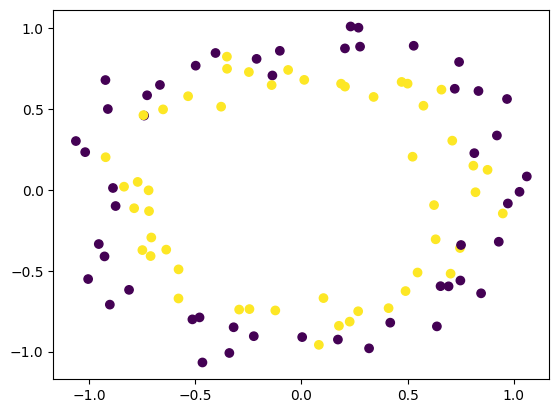

In [30]:
plt.scatter(X[:,0] , X[:,1],c=y)

In [31]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [32]:
import tensorflow
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [33]:
model = Sequential()
model.add(Dense(256 , activation='relu',input_dim=2))
model.add(Dense(1 , activation='sigmoid'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer = 'adam' , loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
history = model.fit(X_train , y_train ,validation_data = (X_test , y_test),epochs=3500,verbose=0)

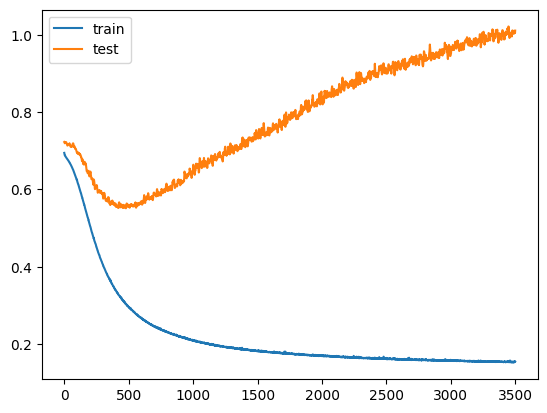

In [36]:
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label = 'test')
plt.legend()
plt.show()

# Early stopping

In [47]:
model1 = Sequential()
model1.add(Dense(256,activation='relu',input_dim=2))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model1.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [54]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [55]:
hist= model1.fit(X_train , y_train , callbacks=[callback ], validation_data=(X_test , y_test),epochs = 3500)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6891 - loss: 0.6392 - val_accuracy: 0.5500 - val_loss: 0.7116
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6617 - loss: 0.6434 - val_accuracy: 0.5500 - val_loss: 0.7117
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6578 - loss: 0.6392 - val_accuracy: 0.5500 - val_loss: 0.7111
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6734 - loss: 0.6360 - val_accuracy: 0.5500 - val_loss: 0.7089
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6875 - loss: 0.6364 - val_accuracy: 0.6000 - val_loss: 0.7067
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7117 - loss: 0.6311 - val_accuracy: 0.6000 - val_loss: 0.7051
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6766 - loss: 0.6380 - val_accuracy: 0.6500 - val_loss: 0.7028
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7203 - loss: 0.6350 - val_accuracy: 0.6500 - v

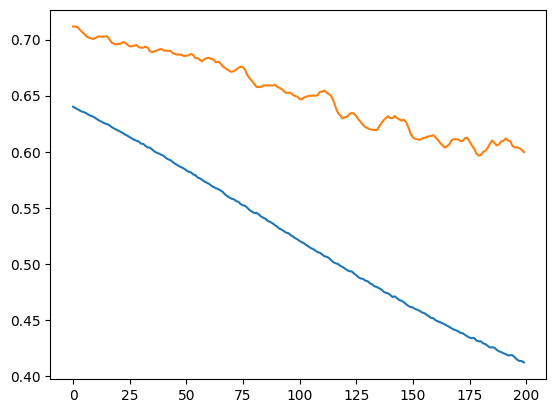

In [56]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])